In [23]:
from google_play_scraper import app, Sort, reviews_all
from app_store_scraper import AppStore
import pandas as pd
import numpy as np
import json, os, uuid


In [24]:
g_reviews = reviews_all(
        "mx.gob.sat",
        sleep_milliseconds=0, # defaults to 0
        lang='es', # defaults to 'en'
        country='us', # defaults to 'us'
        sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    )


In [25]:
g_df = pd.DataFrame(np.array(g_reviews),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))

g_df2.drop(columns={'userImage', 'reviewCreatedVersion'},inplace = True)
g_df2.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'},inplace = True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
g_df2['laguage_code'] = 'en'
g_df2['country_code'] = 'mx'



In [26]:
g_df2

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,25675c4c-6ad9-418d-a813-b1a1ab746132,Un usuario de Google,None,Pues algo funcional para ciertas funciones. Yo...,3,11,2024-04-30 20:48:07,None,None,None,en,mx
1,Google Play,1310ab3e-74dc-428d-9d9d-a2666df29856,Un usuario de Google,None,Es mucho problema actualizar la contraseña por...,1,538,2023-05-01 20:14:04,None,None,2.0.0,en,mx
2,Google Play,ea2d8ff2-6d3b-4ec7-832e-b1a18fd0bd25,Un usuario de Google,None,últimamente la batería de mi teléfono duraba p...,1,6,2024-04-14 14:35:08,None,None,None,en,mx
3,Google Play,393ac311-15e9-4373-a6bf-c4c6c971af5d,Un usuario de Google,None,"No funciona , de pena ajena la app. No se pued...",1,1,2024-05-16 17:55:39,None,None,2.0.1,en,mx
4,Google Play,45fee5d5-16e3-4839-bfeb-18ad5e56b54f,Un usuario de Google,None,"De aplicación no tiene nada, es una porquería....",1,3,2024-05-09 16:51:58,None,None,2.0.1,en,mx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,Google Play,31203a25-8e82-4412-a716-14b52011ee60,Un usuario de Google,None,Ok,5,0,2022-05-31 17:47:10,None,None,None,en,mx
2737,Google Play,3ce88f2d-5b4b-40a7-a472-29200441995d,Un usuario de Google,None,Muy exselentes,5,0,2024-01-01 21:36:19,None,None,None,en,mx
2738,Google Play,d6dbea74-3f9a-4247-a5ac-336d028c248a,Un usuario de Google,None,Buenas noches,5,0,2023-09-11 03:41:32,None,None,None,en,mx
2739,Google Play,7dc3eaaa-44b6-489c-90a2-adcca21cf28d,Un usuario de Google,None,me gustaucjp,5,0,2022-10-02 23:59:49,None,None,None,en,mx


In [40]:
csv=g_df2[['review_description','rating']]

In [35]:
import re

In [45]:
def clean_csv(file):
    df = csv
    df['sentiment'] = df['rating'].map(
             {1:'negative',2:'negative', 3:'neutral', 
             4:'positive', 5:'positive'})
    a, b = 'áéíóúü,.:', 'aeiouu   '
    trans = str.maketrans(a, b)
    df['review_description'] = df['review_description'].apply(
                          lambda x: x.lower())
    print(df.head())
    return df
#call function on the previously collected reviews
df=clean_csv(csv)

                                  review_description  rating sentiment
0  pues algo funcional para ciertas funciones  yo...       3   neutral
1  es mucho problema actualizar la contraseña por...       1  negative
2  ultimamente la bateria de mi telefono duraba p...       1  negative
3  no funciona   de pena ajena la app  no se pued...       1  negative
4  de aplicacion no tiene nada  es una porqueria ...       1  negative


C:\Users\angel\AppData\Local\Temp\ipykernel_8992\502723742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].map(
C:\Users\angel\AppData\Local\Temp\ipykernel_8992\502723742.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_description'] = df['review_description'].apply(


In [46]:
df

,review_description,rating,sentiment
0,pues algo funcional para ciertas funciones yo...,3,neutral
1,es mucho problema actualizar la contraseña por...,1,negative
2,ultimamente la bateria de mi telefono duraba p...,1,negative
3,no funciona de pena ajena la app no se pued...,1,negative
4,de aplicacion no tiene nada es una porqueria ...,1,negative
...,...,...,...
2736,ok,5,positive
2737,muy exselentes,5,positive
2738,buenas noches,5,positive
2739,me gustaucjp,5,positive


accuracy: 0.9089253187613844


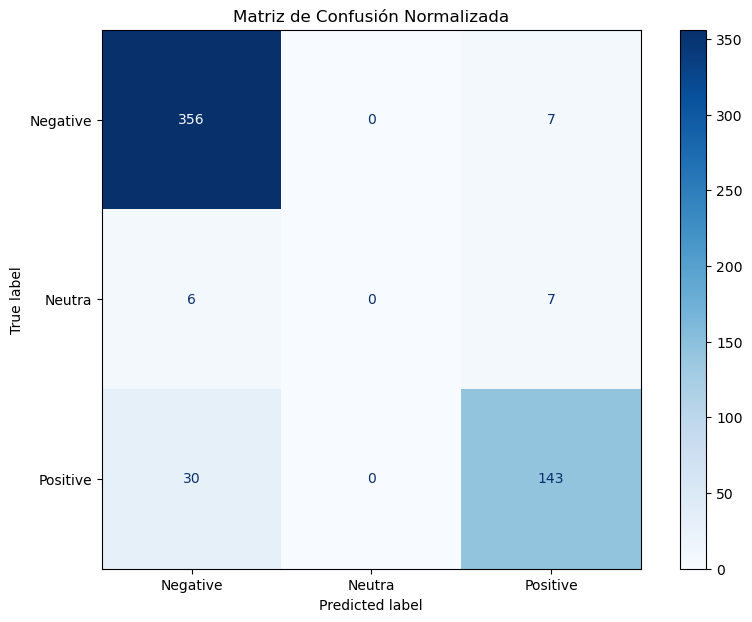

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def naive_bayes(df):
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)
    y_train=train_df['sentiment']
    y_test=test_df['sentiment']
    count_vect = CountVectorizer()
    X_train_count = count_vect.fit_transform(train_df['review_description'])
    X_test_count = count_vect.transform(test_df['review_description'])
    fig, ax = plt.subplots(figsize=(10, 7))

    param_grid = [{'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                 0.7, 0.8, 0.9, 1]}]

    mln = MultinomialNB()
    mln.fit(X_train_count, y_train)


    print("accuracy: {}".format(
          mln.score(X_test_count, y_test)))

    y_test_pred = mln.predict(X_test_count)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative','Neutra', 'Positive'])
    disp.plot(ax=ax, cmap='Blues')
    plt.title('Matriz de Confusión Normalizada')
    plt.show()

#call function on the cleaned reviews
naive_bayes(df)